# Bilinear finite rectangular elements

Take the reference element
$$
\hat K = \{ (\xi, \eta) \; | \; -1 \leq \xi, \eta \leq 1 \} \; .
$$
The corner points are given by
$$
\begin{align*}
P_1 &= (-1, -1) \; , \\
P_2 &= (1, -1) \; , \\
P_3 &= (1, 1) \; , \\
P_4 &= (-1, 1) \; .
\end{align*}
$$

We want to calculate the bilinear basis functions $\varphi_i(\xi, \eta)$, $i = 1,2,3,4$, and the element stiffness matrix
$$
(A_{\hat K})_{i,j} = \int_{\hat K} \nabla \varphi_i \cdot \nabla \varphi_j \; , \quad i,j = 1,2,3,4 \; .
$$

The basis functions $\phi_i$ are of the form
$$
\phi_i(\xi, \eta) = a + b\xi + c \eta + d \xi \eta \; .
$$
First, we need to find the coefficients $a, b, c, d$.

In [1]:
from sympy import *
init_printing()

In [2]:
a, b, c, d, xi, eta = symbols('a, b, c, d, xi, eta')

In [3]:
points = [(-1, -1), (1, -1), (1, 1), (-1, 1)]

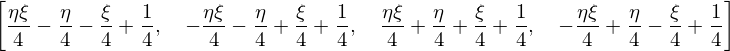

In [4]:
phi = a + b * xi + c * eta + d * xi * eta

basis_functions = []
for i in range(0, 4):
    expressions = []
    for j in range(0, 4):
        phi_mod = phi.subs({xi: points[j][0], eta: points[j][1]})
        if i == j:
            phi_mod = phi_mod - 1
        expressions.append(phi_mod)
    coeffs = linsolve(expressions, (a, b, c, d))
    basis_functions.append(coeffs.args[0][0] + coeffs.args[0][1]*xi + coeffs.args[0][2]*eta + coeffs.args[0][3]*xi*eta)
basis_functions

Now we are able to calculate the element stiffness matrix $A_{\hat K}$.

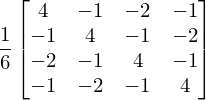

In [5]:
diffs_xi = [diff(b, xi) for b in basis_functions]
diffs_eta = [diff(b, eta) for b in basis_functions]

rows = []
for c in range(4):
    row = []
    for r in range(4):
        row.append(integrate(diffs_xi[r] * diffs_xi[c] + diffs_eta[r] * diffs_eta[c], (xi, -1, 1), (eta, -1, 1)))
    rows.append(row)
A_K = Matrix(rows)
g = gcd(tuple(A_K))
MatMul(g, A_K/g, evaluate=False)